In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import linear_model

In [2]:
# Model-specific imports:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
2641,2642,8000.9,587.1,3474.7,1202.7,298.4,7074.5,4127.4,400.0,205805.9625,...,2.325,2.560,2.409,2.167,2.530,2.404,2.794,2.507,2.45380,41
3436,3437,8690.6,776.1,3716.7,1547.6,384.6,8365.5,4705.7,426.2,214817.5642,...,2.511,2.890,2.669,2.301,2.645,2.548,2.970,2.730,2.54851,21
2989,2990,8896.5,853.0,4731.0,1748.7,392.2,8100.2,5991.7,930.2,294102.6284,...,2.622,2.978,2.729,2.217,2.790,2.591,2.969,2.894,2.64764,21
367,368,6086.9,1520.5,3167.3,1095.8,1010.9,5546.9,3795.6,311.4,174108.1815,...,2.000,2.111,2.051,1.778,2.016,1.995,2.083,2.250,2.03238,80
3559,3560,9501.4,1199.6,4221.4,1699.6,534.8,9889.8,5507.5,578.2,262193.4054,...,2.609,2.698,2.440,1.980,2.649,2.483,2.838,2.598,2.53572,34


In [4]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['Age'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [5]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X.shape
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(4226, 14)

In [6]:
# instantiate a logistic regression model using sklearn:

reg = linear_model.BayesianRidge()

# fit the model to the training data
reg.fit(X_train, y_train)

BayesianRidge()

In [7]:
# check the model's performance on unseen, test data
predictions = reg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.7587644613046812
mean absolute error (years): 7.7809690314077375
mean square error: 101.713613756884
root mean absolute error (years): 10.085316740533438


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

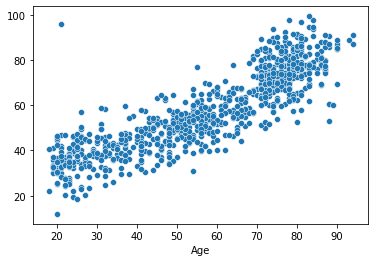

In [8]:
import seaborn as sns
sns.scatterplot(y_test, predictions)

In [9]:
# similar to linear regression, but since linear regression was good fit we expect this 
#to also be a good fit

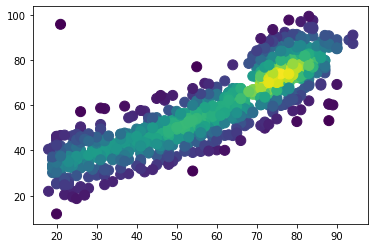

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()